# Sentiment Analysis of IMDB Dataset

In [111]:
# import nltk 
# nltk.download('stopwords')
# !pip install wordcloud

In [112]:
#Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [113]:
df = pd.read_csv('IMDB Dataset.csv', encoding='latin1')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [114]:
df.shape

(25526, 2)

In [115]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [116]:
df.duplicated().sum()

109

In [117]:
df.drop_duplicates(inplace = True)

In [118]:
df.shape

(25417, 2)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25417 entries, 0 to 25525
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25417 non-null  object
 1   sentiment  25417 non-null  object
dtypes: object(2)
memory usage: 595.7+ KB


In [120]:
df['sentiment'].value_counts()

positive    12741
negative    12676
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Sentiment Distribution')

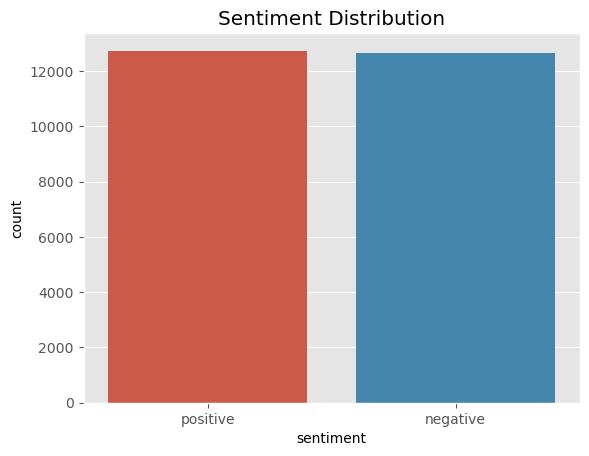

In [121]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")

In [122]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [123]:
df['word count'] = df['review'].apply(no_of_words)

In [124]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


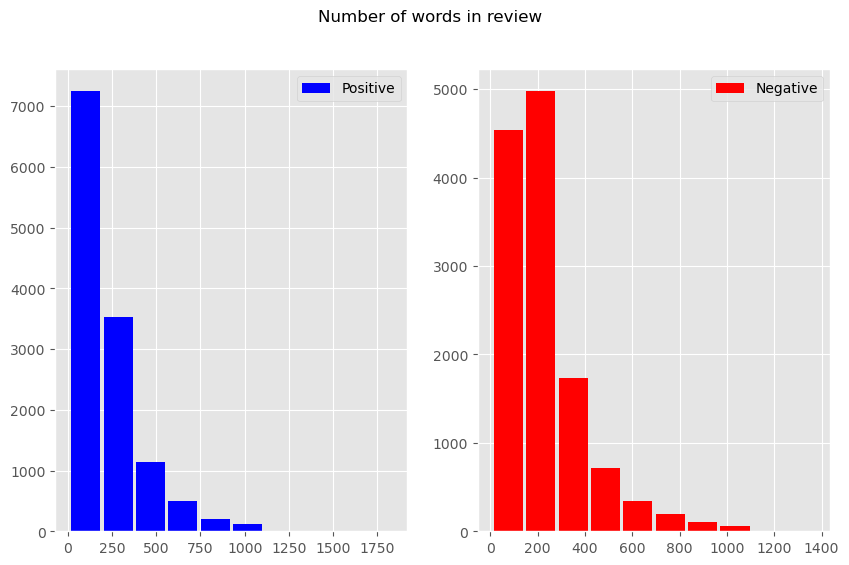

In [125]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

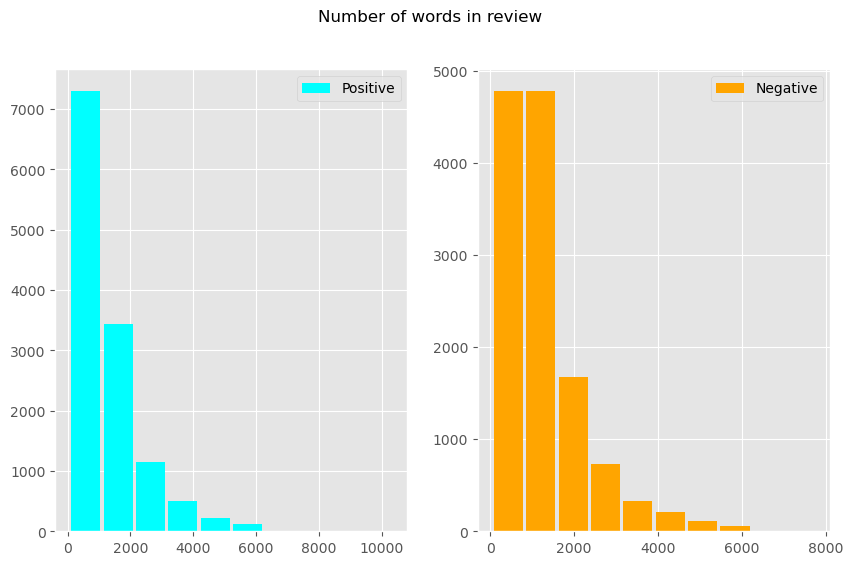

In [126]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='cyan', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='orange', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [127]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 2, inplace=True)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


# Data Processing

In [128]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [129]:
# import nltk
# nltk.download('punkt')

In [130]:
df.review = df['review'].apply(data_processing)

In [131]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [132]:
df.review = df['review'].apply(lambda x: stemming(x))

In [133]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,2,67
4,petter matteis love time money visually stunni...,1,125


In [134]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


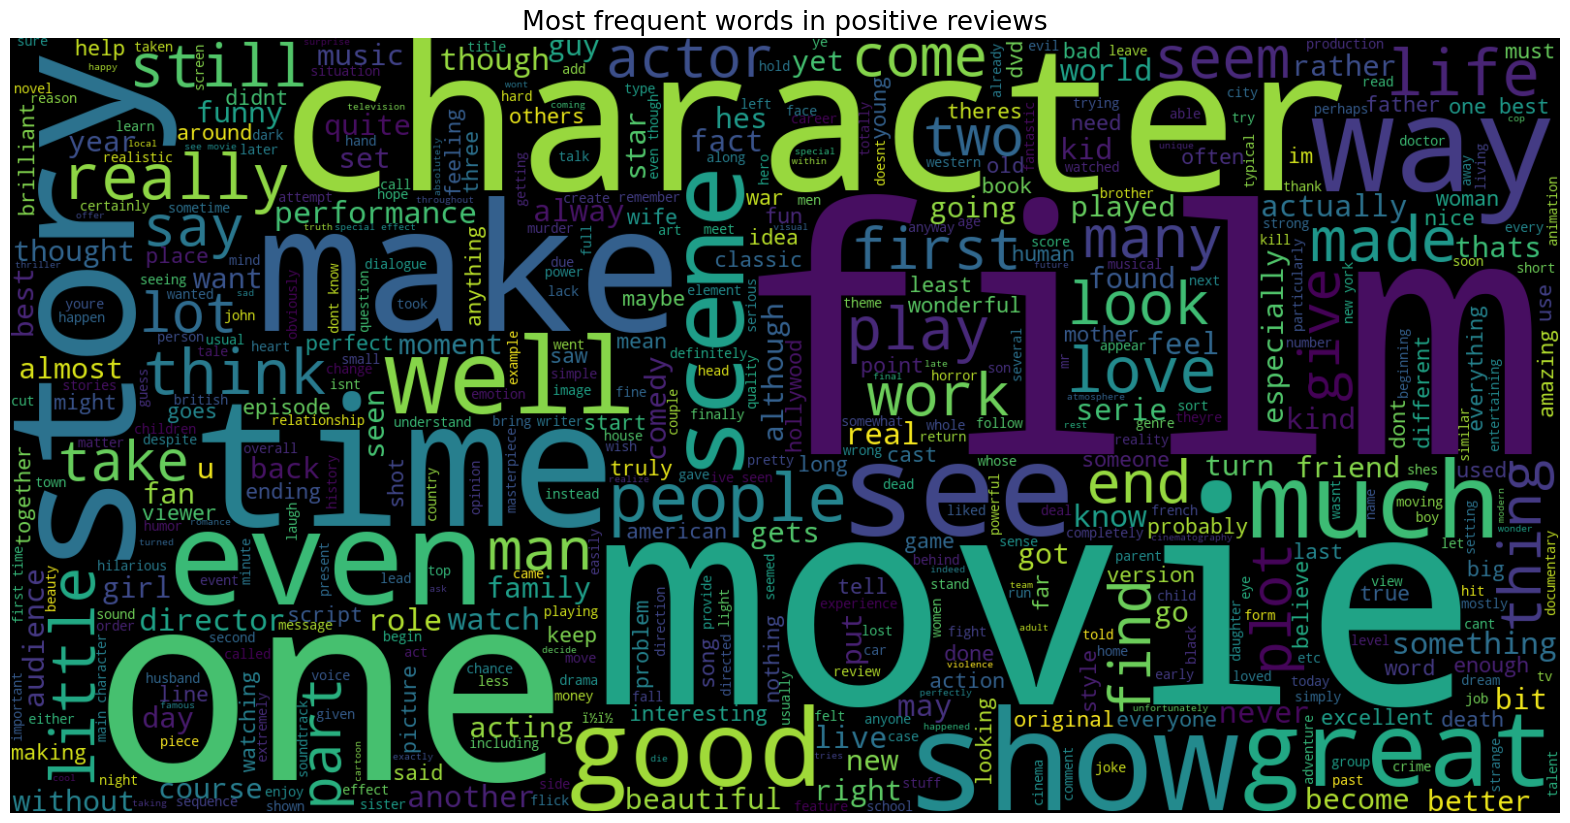

In [135]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [136]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 20228),
 ('movie', 18404),
 ('one', 13111),
 ('like', 8768),
 ('good', 7353),
 ('story', 6321),
 ('great', 6297),
 ('see', 6017),
 ('time', 5957),
 ('well', 5650),
 ('really', 5407),
 ('would', 5365),
 ('also', 5321),
 ('even', 4679),
 ('much', 4652)]

In [137]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,20228
1,movie,18404
2,one,13111
3,like,8768
4,good,7353


In [138]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')

In [139]:
neg_reviews =  df[df.sentiment == 2]
neg_reviews.head()

,review,sentiment,word count
3,basically theres family little boy jake thinks...,2,67
7,show amazing fresh innovative idea 70s first a...,2,83
8,encouraged positive comments film looking forw...,2,64
10,phil alien one quirky films humour based aroun...,2,51
11,saw movie 12 came recall scariest scene big bi...,2,84


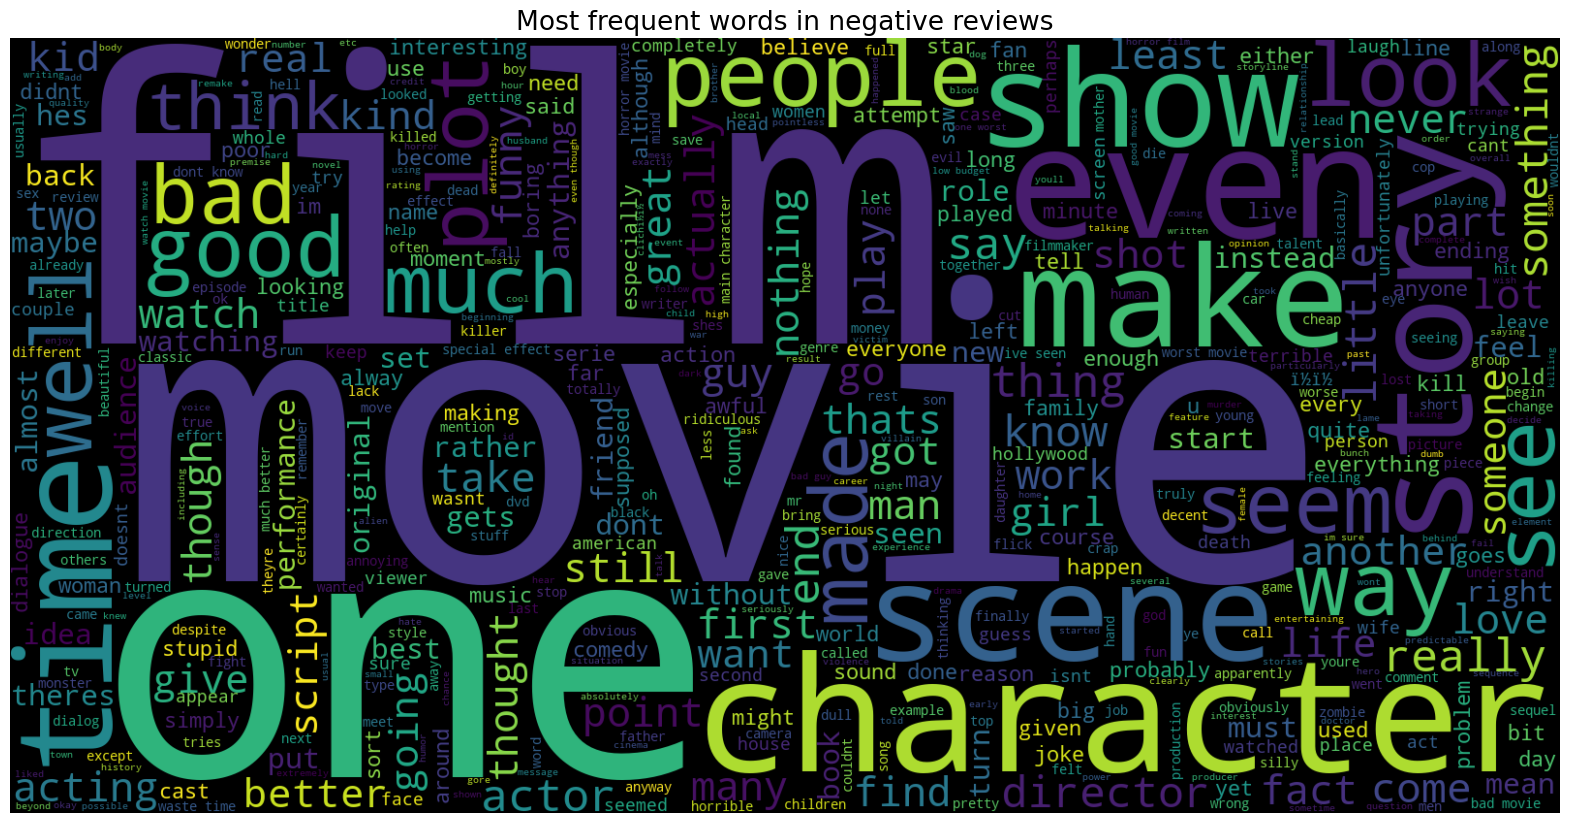

In [140]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [141]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 24161),
 ('film', 17695),
 ('one', 12422),
 ('like', 11061),
 ('even', 7678),
 ('good', 7249),
 ('bad', 7112),
 ('would', 6995),
 ('really', 6095),
 ('time', 5849),
 ('see', 5348),
 ('get', 5174),
 ('dont', 5097),
 ('much', 4996),
 ('story', 4897)]

In [142]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,24161
1,film,17695
2,one,12422
3,like,11061
4,even,7678


In [155]:
X = df['review']
Y = df['sentiment']

In [156]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [157]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [158]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (17791, 147897)
Size of y_train:  (17791,)
Size of x_test:  (7626, 147897)
Size of y_test:  (7626,)


In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [160]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 88.25%


In [161]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[3443  373]
 [ 523 3287]]


              precision    recall  f1-score   support

           1       0.87      0.90      0.88      3816
           2       0.90      0.86      0.88      3810

    accuracy                           0.88      7626
   macro avg       0.88      0.88      0.88      7626
weighted avg       0.88      0.88      0.88      7626



In [162]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.34%


In [163]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[3232  584]
 [ 458 3352]]


              precision    recall  f1-score   support

           1       0.88      0.85      0.86      3816
           2       0.85      0.88      0.87      3810

    accuracy                           0.86      7626
   macro avg       0.86      0.86      0.86      7626
weighted avg       0.86      0.86      0.86      7626



In [164]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 88.25%


In [165]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[3417  399]
 [ 497 3313]]


              precision    recall  f1-score   support

           1       0.87      0.90      0.88      3816
           2       0.89      0.87      0.88      3810

    accuracy                           0.88      7626
   macro avg       0.88      0.88      0.88      7626
weighted avg       0.88      0.88      0.88      7626



In [166]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.866 total time=   0.0s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.864 total time=   0.0s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.855 total time=   0.0s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.848 total time=   0.0s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.856 total time=   0.0s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.889 total time=   0.0s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.891 total time=   0.0s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.879 total time=   0.0s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.873 total time=   0.0s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.881 total time=   0.0s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.894 total time=   1.4s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [167]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.89
best parameters:  {'C': 1, 'loss': 'hinge'}


In [168]:
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 88.74%


In [169]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[3445  371]
 [ 488 3322]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      3816
           2       0.90      0.87      0.89      3810

    accuracy                           0.89      7626
   macro avg       0.89      0.89      0.89      7626
weighted avg       0.89      0.89      0.89      7626



In [170]:
import joblib

# Save the vectorizer and the model
joblib.dump(vect, 'tfidf_vectorizer.pkl')
joblib.dump(svc, 'svc_model.pkl')


['svc_model.pkl']